In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
reviews_df= pd.read_csv('Olist_Data/olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('Olist_Data/olist_orders_dataset.csv')
customers_df = pd.read_csv('Olist_Data/olist_customers_dataset.csv')

In [83]:
#revisamos si hay nulos
print(reviews_df.isnull().values.any())
print(orders_df.isnull().values.any())
print(customers_df.isnull().values.any())

True
True
False


In [84]:
#devuelve nulos en el de reviews vamos a ver que columnas es/son
print(reviews_df.isnull().sum())
#son en comentarios, para este caso no influyen en los resultados.

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [85]:
#nos quedamos con las columnas que nos interesan para poder traer el estado al dataset de reviews
orders=orders_df[['order_id','customer_id']].copy()
orders

,order_id,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c
...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1


In [86]:
#nos quedamos con el id y el estado
customers=customers_df[['customer_id','customer_state']].copy()
customers

,customer_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP
1,18955e83d337fd6b2def6b18a428ac77,SP
2,4e7b3e00288586ebd08712fdd0374a03,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,SP
...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,CE
99439,56b18e2166679b8a959d72dd06da27f9,RS


In [87]:
#en Reviews nos quedaremos con las columnas que nos interesan, que son review_id para eliminar los registros que llegaron tarde, el order_id para enlazar con los otros df y el score para la puntuacion
reviews=reviews_df[['review_id','order_id','review_score']].copy()
reviews

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5
...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4


In [88]:
#hacemos un primer merge para traer el campo necesario para traer en el segundo el campo necesario para agrupar por el estado
df= pd.merge(reviews,orders,on='order_id',how='left')
df= pd.merge(df,customers,on='customer_id',how='left')
df=df[['review_id','review_score','customer_state']]
df

,review_id,review_score,customer_state
0,7bc2406110b926393aa56f80a40eba40,4,SP
1,80e641a11e56f04c1ad469d5645fdfde,5,SP
2,228ce5500dc1d8e020d8d1322874b6f0,5,BA
3,e64fb393e7b32834bb789ff8bb30750e,5,SC
4,f7c4243c7fe1938f181bec41a392bdeb,5,SC
...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,5,GO
99220,f3897127253a9592a73be9bdfdf4ed7a,5,RJ
99221,b3de70c89b1510c4cd3d0649fd302472,5,MG
99222,1adeb9d84d72fe4e337617733eb85149,4,MG


In [89]:
#Aqui eliminamos los registros de las reviews que se han entregado tarde

In [90]:
#agrupamos por ciudad y contamos los registros que hay en cada una y su puntuacion media
df = df.groupby('customer_state').agg(
    num_reviews=('review_id', 'count'),    
    score_medio=('review_score', 'mean') 
).reset_index()
df['score_medio']=df['score_medio'].round(2)
df

,customer_state,num_reviews,score_medio
0,AC,81,4.05
1,AL,414,3.75
2,AM,147,4.18
3,AP,67,4.19
4,BA,3357,3.86
5,CE,1329,3.85
6,DF,2148,4.06
7,ES,2016,4.04
8,GO,2024,4.04
9,MA,746,3.76


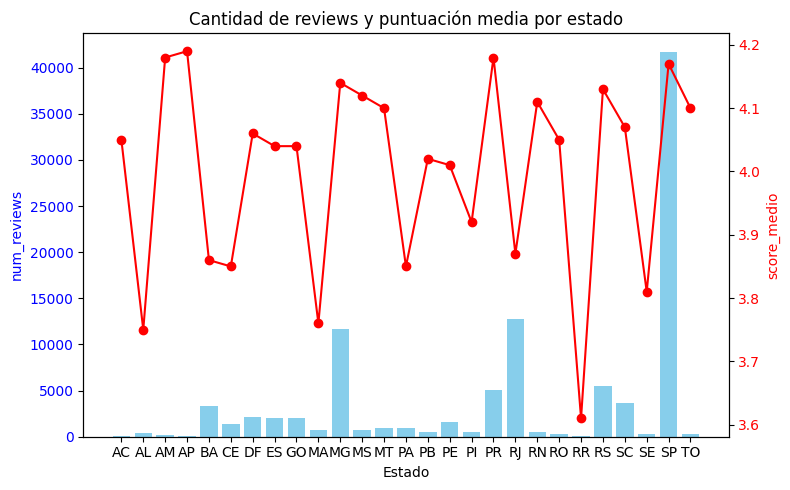

In [91]:
# Crear figura y eje
fig, ax1 = plt.subplots(figsize=(8, 5))

# Eje 1: gráfico de barras
ax1.bar(df['customer_state'], df['num_reviews'], color='skyblue', label='num_reviews')
ax1.set_xlabel('Estado')
ax1.set_ylabel('num_reviews', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear segundo eje (compartiendo el eje x)
ax2 = ax1.twinx()

# Eje 2: gráfico de línea
ax2.plot(df['customer_state'], df['score_medio'], color='red', marker='o', label='score_medio')
ax2.set_ylabel('score_medio', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Título y leyendas
plt.title('Cantidad de reviews y puntuación media por estado')
fig.tight_layout()  # Ajusta espaciado

plt.show()
